In [1]:
import json
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font='Fira Code', font_scale=0.8, style='whitegrid')
sns.set_style({'grid.linestyle': ':'})

In [2]:
def get_filename(crawl, climb, size, mass, count):
    return f'../data/crawl_{crawl}_climb_{climb}_size_{size}_mass_{mass}_cnt_{count}.json';

In [3]:
def power(x, a, C):
    return C * pow(x, a)

## **Part I: Varying Bee Count (crawl_rate = climb_rate = 0.4)**

In [4]:
palette = sns.color_palette('crest', n_colors=8)
palette.reverse()

In [5]:
crawl, climb, size, mass = '0.4', '0.4', '0', '0'
counts = [100, 150, 200, 250, 300, 350, 400, 450]

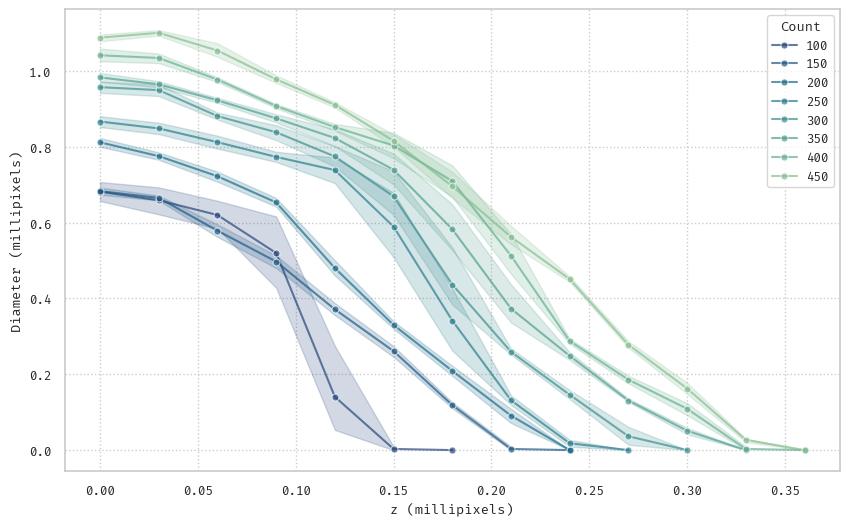

In [6]:
rows = []

for count in counts:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['widthGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], count])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Count'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Count', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='Diameter (millipixels)')

plt.show()

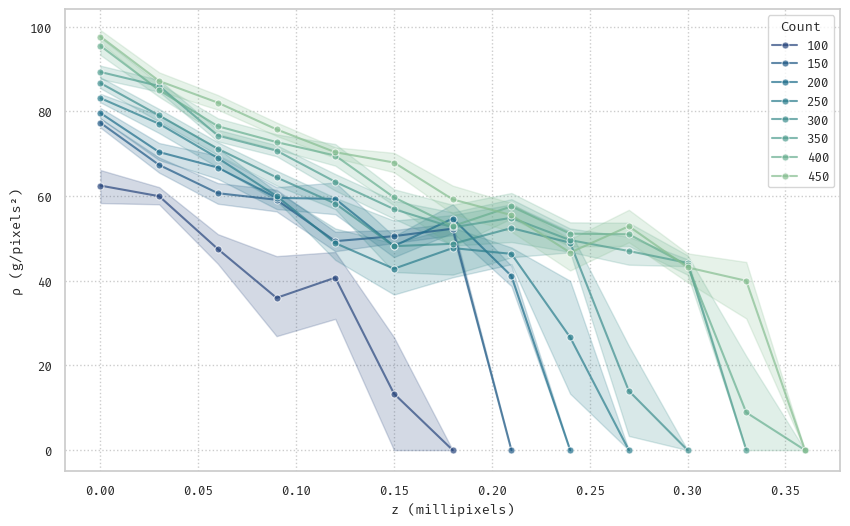

In [7]:
rows = []

for count in counts:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['densityGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], count])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Count'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Count', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='ρ (g/pixels²)')

plt.show()

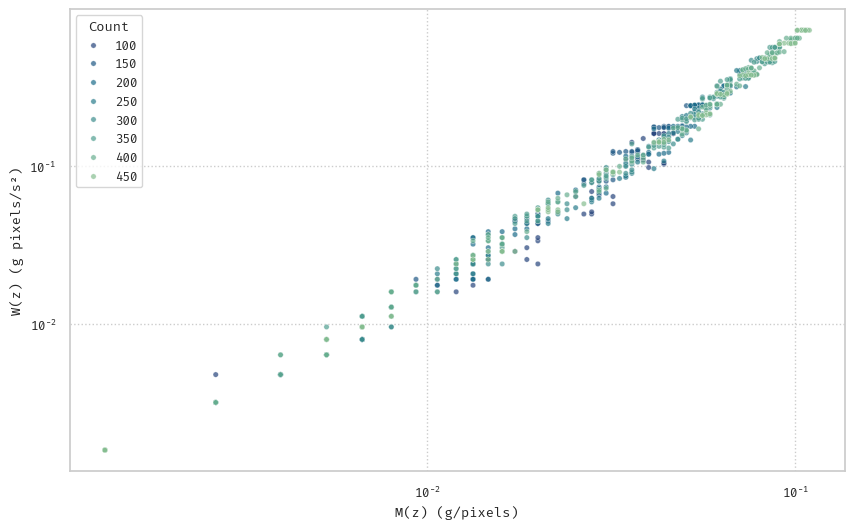

In [8]:
rows = []

for count in counts:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], count])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Count'])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='x', y='y', data=df, hue='Count', palette=palette, marker='o', s=15, alpha=0.7)
ax.set(xlabel='M(z) (g/pixels)', ylabel='W(z) (g pixels/s²)', xscale='log', yscale='log')

plt.show()

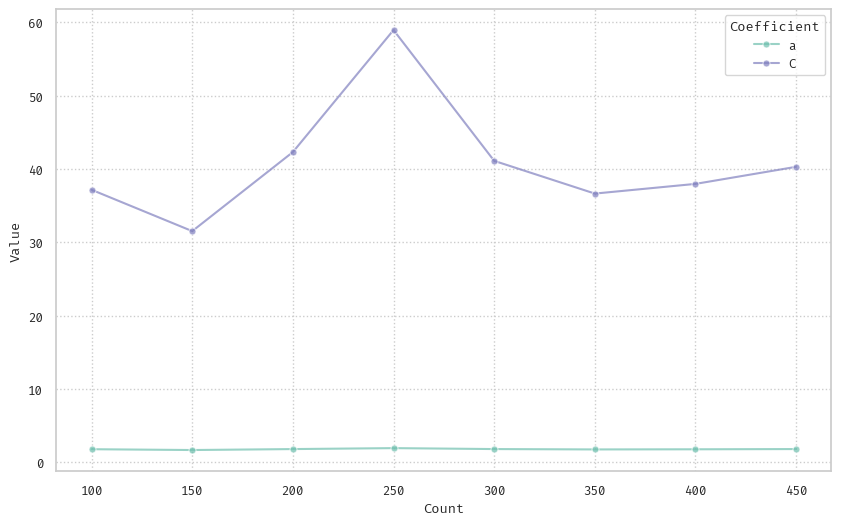

In [9]:
rows = []

for count in counts:
    x, y = [], []
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            x.append(point['x'])
            y.append(point['y'])
    coefficients, _ = scipy.optimize.curve_fit(power, x, y, [0, 0])
    rows.append([count, coefficients[0], "a"])
    rows.append([count, coefficients[1], "C"])

df = pd.DataFrame(rows, columns=['Count', 'Value', 'Coefficient'])

plt.figure(figsize=(10, 6))
palette_duo = ["#70C0AF", "#8080BF"]
ax = sns.lineplot(x='Count', y='Value', data=df, hue='Coefficient', marker='o', palette=palette_duo, markersize=5, alpha=0.7)

plt.show()

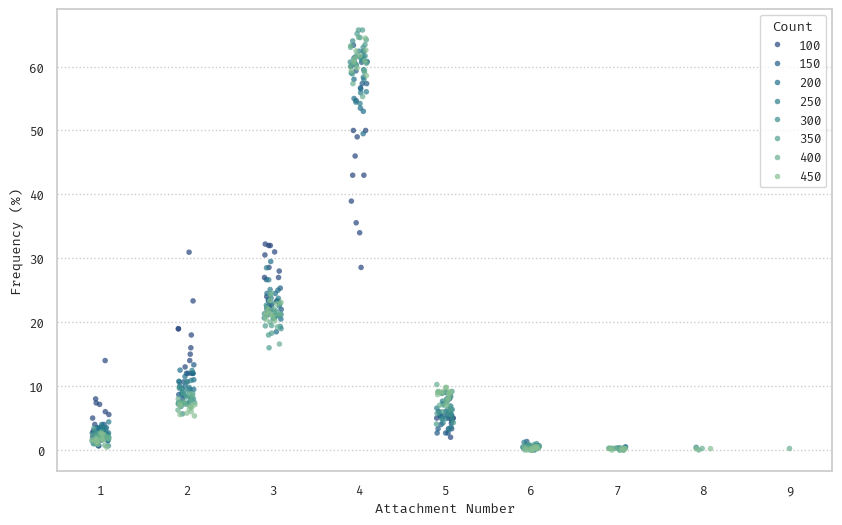

In [10]:
rows = []

for count in counts:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['attachmentGraphs']:
        total = sum([point['y'] for point in graph])
        for point in graph:
            if point['x']:
                rows.append([point['x'], 100*point['y']/total, count])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Count'])

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='x', y='y', data=df, hue='Count', palette=palette, alpha=0.7, size=4)
ax.set(xlabel='Attachment Number', ylabel='Frequency (%)')

plt.show()

## **Part II: Varying crawl_rate (climb_rate = 0.4, bee_count = 250)**

In [11]:
palette = sns.color_palette('flare')
palette.reverse()

In [12]:
count, climb, size, mass = '250', '0.4', '0', '0'
crawls = ['0', '0.2', '0.4', '0.6', '0.8', '1']

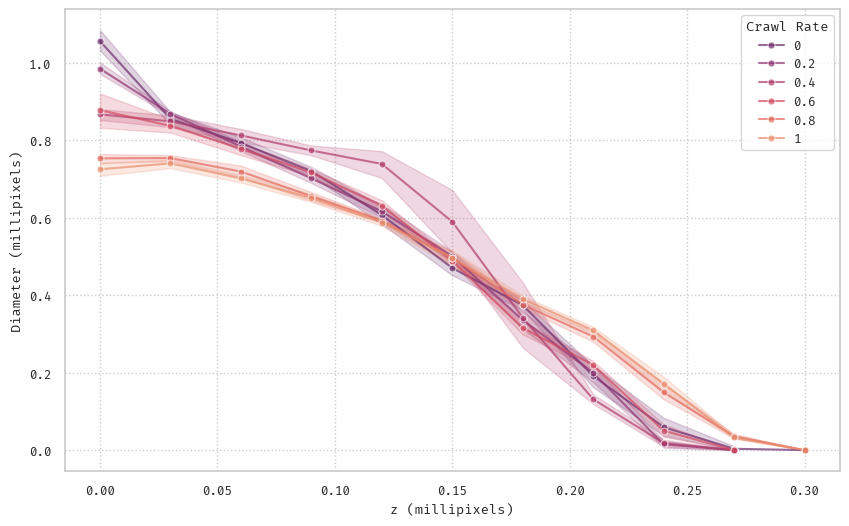

In [13]:
rows = []

for crawl in crawls:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['widthGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], crawl])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Crawl Rate'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Crawl Rate', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='Diameter (millipixels)')

plt.show()

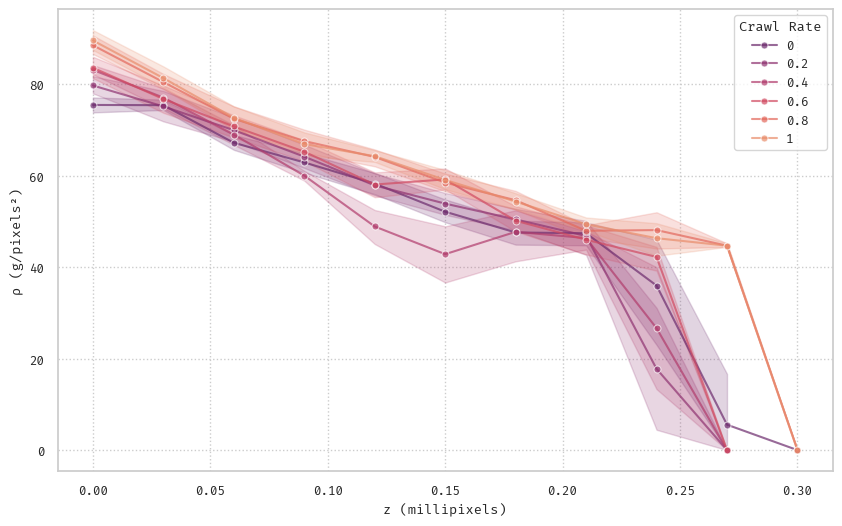

In [14]:
rows = []

for crawl in crawls:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['densityGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], crawl])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Crawl Rate'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Crawl Rate', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='ρ (g/pixels²)')

plt.show()

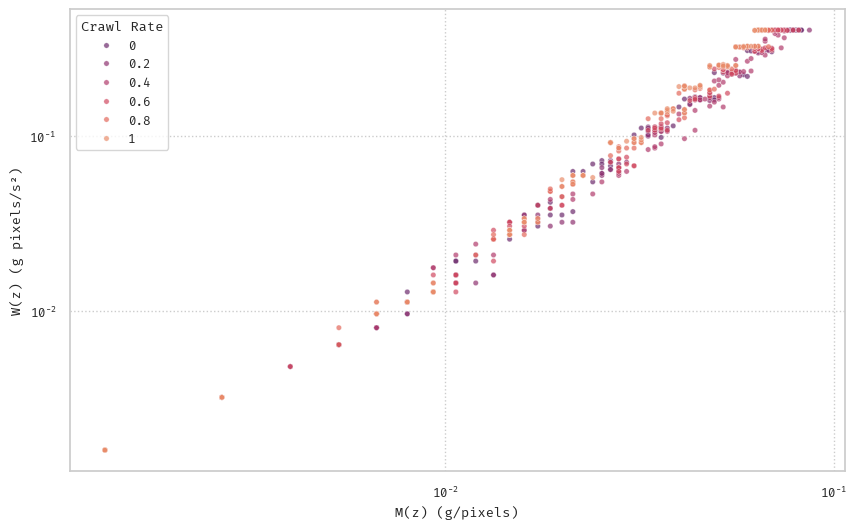

In [15]:
rows = []

for crawl in crawls:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], crawl])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Crawl Rate'])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='x', y='y', data=df, hue='Crawl Rate', palette=palette, marker='o', s=15, alpha=0.7)
ax.set(xlabel='M(z) (g/pixels)', ylabel='W(z) (g pixels/s²)', xscale='log', yscale='log')

plt.show()

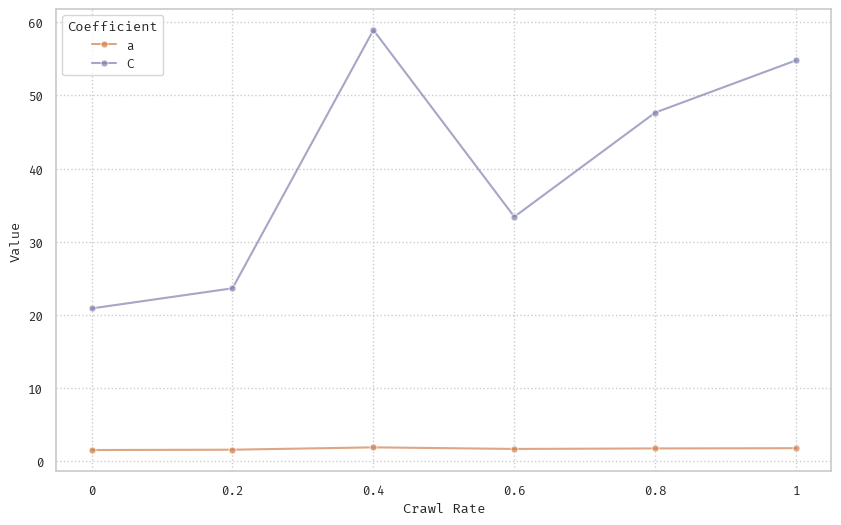

In [16]:
rows = []

for crawl in crawls:
    x, y = [], []
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            x.append(point['x'])
            y.append(point['y'])
    coefficients, _ = scipy.optimize.curve_fit(power, x, y, [0, 0])
    rows.append([crawl, coefficients[0], "a"])
    rows.append([crawl, coefficients[1], "C"])

df = pd.DataFrame(rows, columns=['Crawl Rate', 'Value', 'Coefficient'])

plt.figure(figsize=(10, 6))
palette_duo = ["#D0804F", "#8080AF"]
ax = sns.lineplot(x='Crawl Rate', y='Value', data=df, hue='Coefficient', marker='o', palette=palette_duo, markersize=5, alpha=0.7)

plt.show()

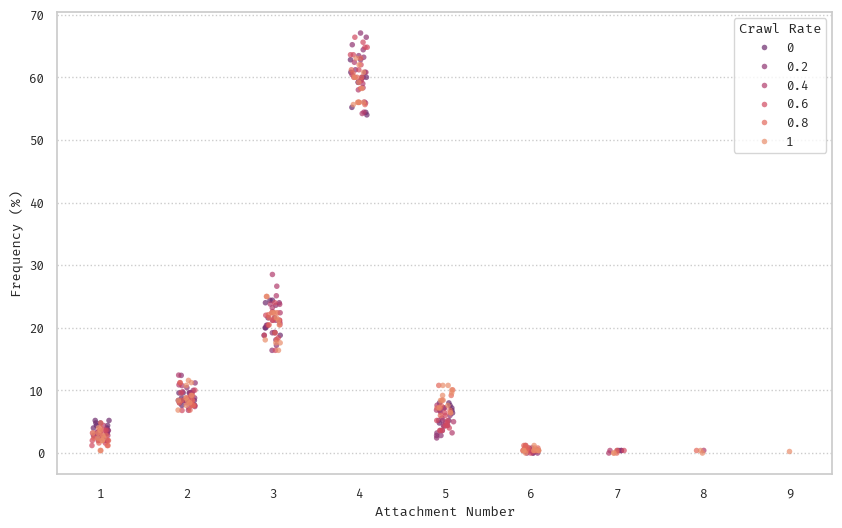

In [17]:
rows = []

for crawl in crawls:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['attachmentGraphs']:
        total = sum([point['y'] for point in graph])
        for point in graph:
            if point['x']:
                rows.append([point['x'], 100*point['y']/total, crawl])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Crawl Rate'])

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='x', y='y', data=df, hue='Crawl Rate', palette=palette, alpha=0.7, size=4)
ax.set(xlabel='Attachment Number', ylabel='Frequency (%)')

plt.show()

## **Part III: Varying climb_rate (crawl_rate = 0.4, bee_count = 250)**

In [18]:
palette = sns.color_palette('viridis')

In [19]:
count, crawl, size, mass = '250', '0.4', '0', '0'
climbs = ['0', '0.2', '0.4', '0.6', '0.8', '1']

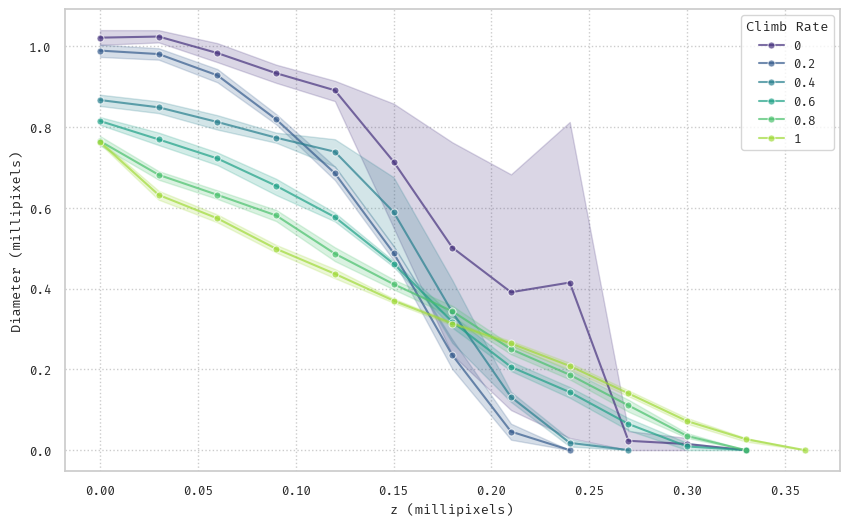

In [20]:
rows = []

for climb in climbs:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['widthGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], climb])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Climb Rate'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Climb Rate', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='Diameter (millipixels)')

plt.show()

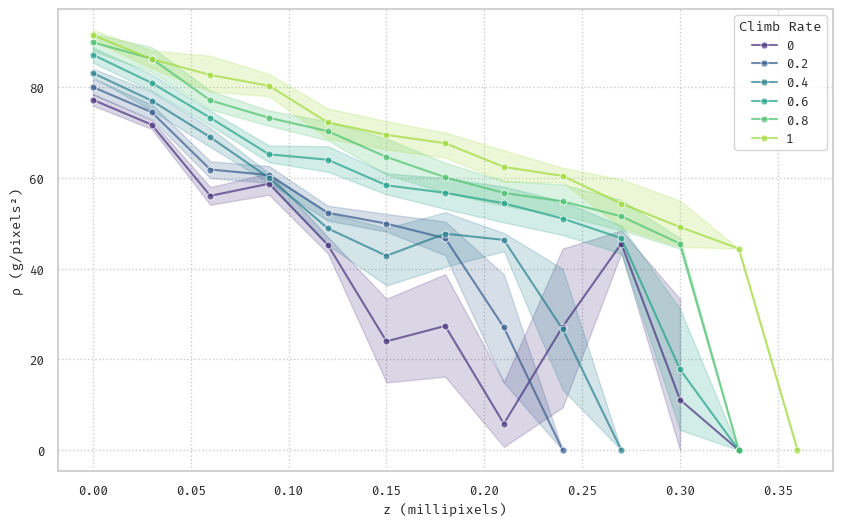

In [21]:
rows = []

for climb in climbs:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['densityGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], climb])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Climb Rate'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='x', y='y', data=df, hue='Climb Rate', palette=palette, marker='o', markersize=5, alpha=0.7)
ax.set(xlabel='z (millipixels)', ylabel='ρ (g/pixels²)')

plt.show()

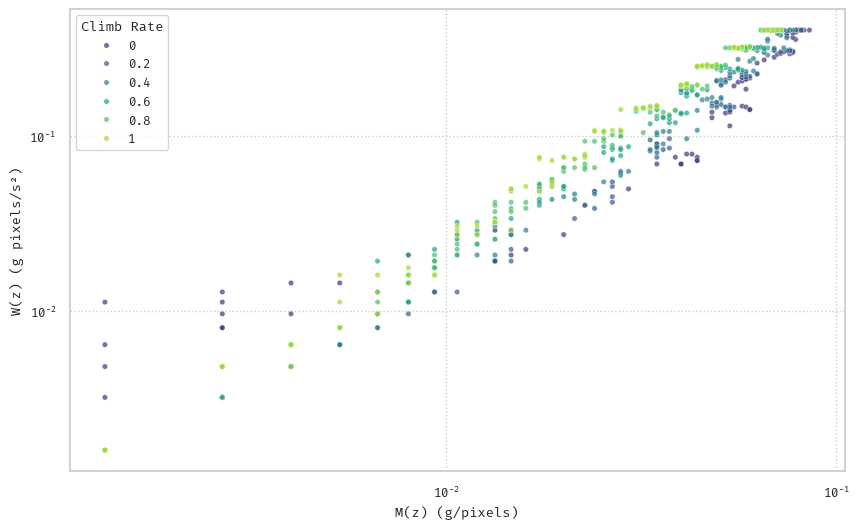

In [22]:
rows = []

for climb in climbs:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            rows.append([point['x'], point['y'], climb])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Climb Rate'])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='x', y='y', data=df, hue='Climb Rate', palette=palette, marker='o', s=15, alpha=0.7)
ax.set(xlabel='M(z) (g/pixels)', ylabel='W(z) (g pixels/s²)', xscale='log', yscale='log')

plt.show()

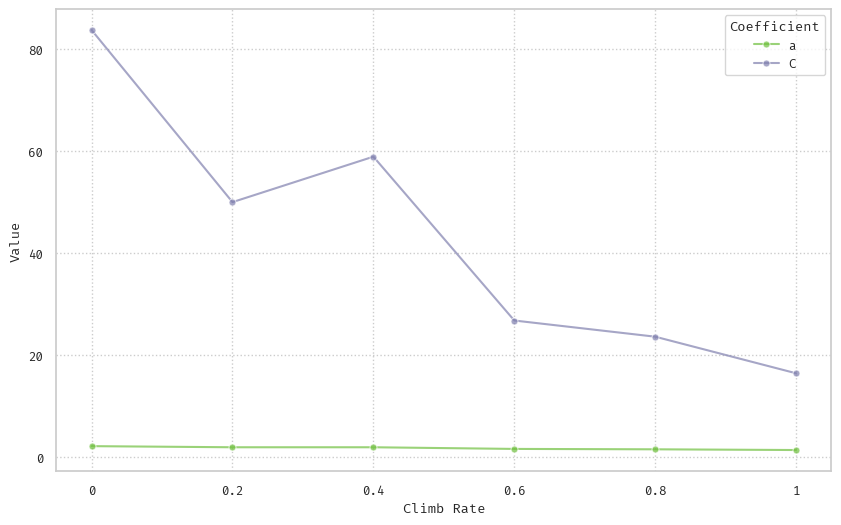

In [23]:
rows = []

for climb in climbs:
    x, y = [], []
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['weightGraphs']:
        for point in graph:
            x.append(point['x'])
            y.append(point['y'])
    coefficients, _ = scipy.optimize.curve_fit(power, x, y, [0, 0])
    rows.append([climb, coefficients[0], "a"])
    rows.append([climb, coefficients[1], "C"])

df = pd.DataFrame(rows, columns=['Climb Rate', 'Value', 'Coefficient'])

plt.figure(figsize=(10, 6))
palette_duo = ["#70C03F", "#8080AF"]
ax = sns.lineplot(x='Climb Rate', y='Value', data=df, hue='Coefficient', marker='o', palette=palette_duo, markersize=5, alpha=0.7)

plt.show()

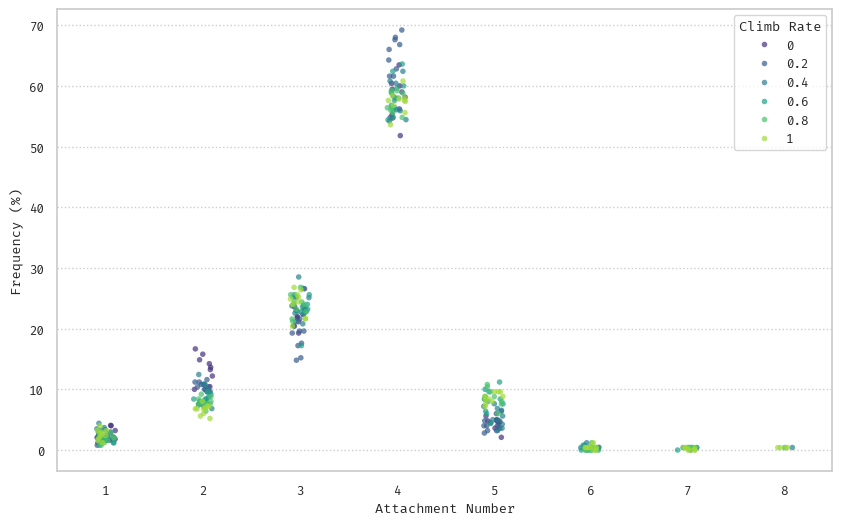

In [24]:
rows = []

for climb in climbs:
    filename = get_filename(crawl, climb, size, mass, count)
    with open(filename, 'r') as file:
        data = json.load(file)
    for graph in data['attachmentGraphs']:
        total = sum([point['y'] for point in graph])
        for point in graph:
            if point['x']:
                rows.append([point['x'], 100*point['y']/total, climb])
            
df = pd.DataFrame(rows, columns=['x', 'y', 'Climb Rate'])

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='x', y='y', data=df, hue='Climb Rate', palette=palette, alpha=0.7, size=4)
ax.set(xlabel='Attachment Number', ylabel='Frequency (%)')

plt.show()

## **Part IV: Varying both climb_rate and crawl_rate (bee_count = 100)**

In [25]:
count, size, mass = '100', '0', '0'
crawls = ['0', '0.2', '0.4', '0.6', '0.8', '1']
climbs = ['0', '0.2', '0.4', '0.6', '0.8', '1']

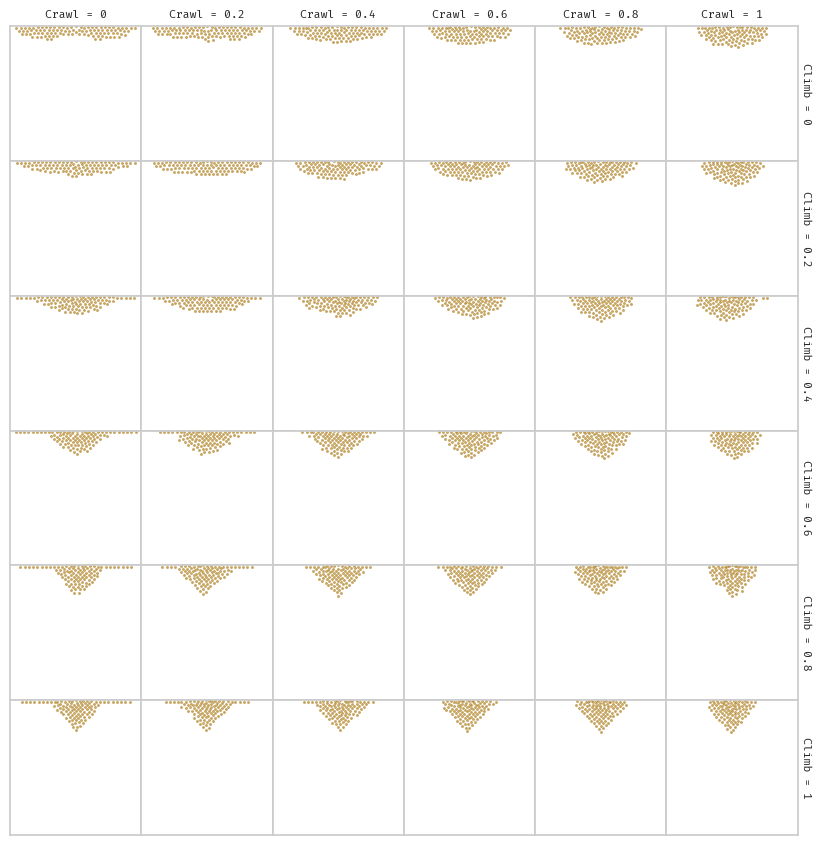

In [26]:
rows = []
for crawl in crawls:
    for climb in climbs:
        filename = get_filename(crawl, climb, size, mass, count)
        with open(filename, 'r') as file:
            data = json.load(file)
        max_x = max([point['x'] for point in data['points']])
        min_x = min([point['x'] for point in data['points']])
        halved = (max_x - min_x) / 2
        for point in data['points']:
            rows.append([point['x'] - halved, -point['y'], crawl, climb])

df = pd.DataFrame(rows, columns=['x', 'y', 'Crawl Rate', 'Climb Rate'])

g = sns.FacetGrid(df, col='Crawl Rate', row='Climb Rate', margin_titles=True, despine=False, height=1.5, xlim=[-500, 500], ylim=[-1000, 0])
g.map(sns.scatterplot, 'x', 'y', marker='o', s=5, alpha=0.7, color='#b08020')
g.set_titles(col_template='Crawl = {col_name}', row_template='Climb = {row_name}', size=8)

g.set(xticks=[])
g.set(yticks=[])
g.set(xlabel=None)
g.set(ylabel=None)

g.figure.subplots_adjust(wspace=0, hspace=0)

plt.show()

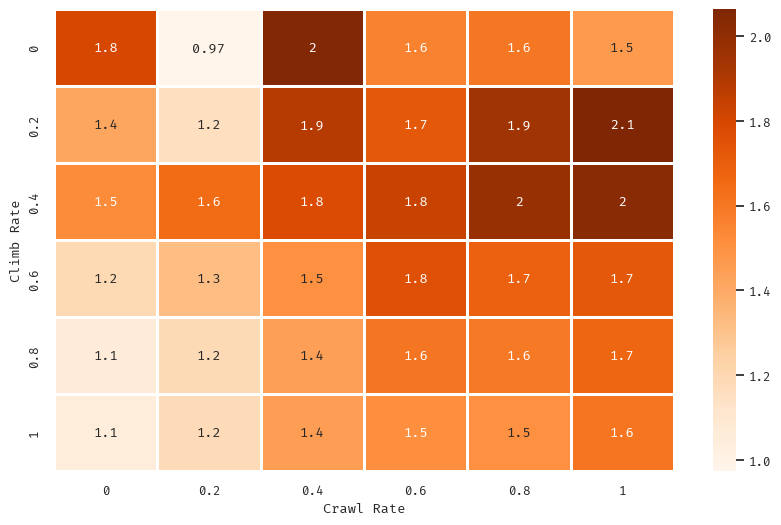

In [28]:
rows = []
for crawl in crawls:
    for climb in climbs:
        filename = get_filename(crawl, climb, size, mass, count)
        with open(filename, 'r') as file:
            data = json.load(file)
        x, y = [], []
        for graph in data['weightGraphs']:
            for point in graph:
                x.append(point['x'])
                y.append(point['y'])
        coefficients, _ = scipy.optimize.curve_fit(power, x, y, [0, 0])
        rows.append([crawl, climb, coefficients[0]])

df_raw = pd.DataFrame(rows, columns=['Crawl Rate', 'Climb Rate', 'a'])
df = df_raw.pivot(index='Climb Rate', columns='Crawl Rate', values='a')

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, linewidths=1, cmap='Oranges')

plt.show()